In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

import IPython.display as ipd

import sys
sys.path.append('waveglow/')
import numpy as np
import torch
import inference
import scipy
import soundfile as sf

from hparams import create_hparams
from model import Tacotron2
from layers import TacotronSTFT, STFT
from audio_processing import griffin_lim
from train import load_model
from text import text_to_sequence


Starting to Load Glove vectors
Completed opening file in 0.0002262592315673828 seconds
Completed reading 0 words in 0.0006022453308105469 seconds
Completed constructing dict in 38.88933229446411 seconds
Making Unknown Token
Completed Unknown Token in 1.5145535469055176 seconds
Loading Model from checkpoint outdir_unsupervised/checkpoint_10000

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Initializing Distributed
Done initializing distributed
Running inference on text: molecular genetics
Warning! Reached max decoder steps
Finished inference in 1.8824243545532227 seconds


/home/bill/.conda/envs/nlp/lib/python3.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/bill/.conda/envs/nlp/lib/python3.7/site-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv1d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
./waveglow/glow.py:162: RuntimeWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  torch.IntTensor([self.n_channels]))
./waveglow/glow.py:162: RuntimeWarning: nn.functional.sigmoid is deprecated. Use 

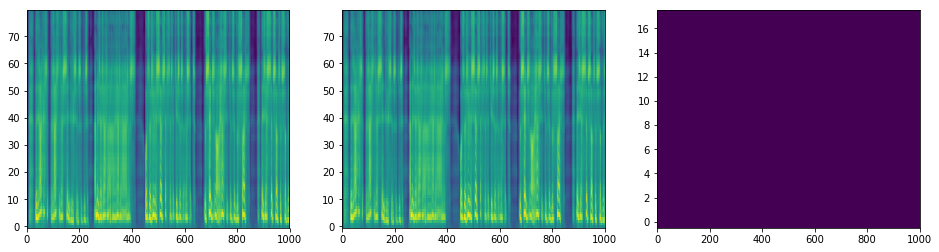

In [2]:
audio, mel_outputs, mel_outputs_postnet, alignments, model, glove, glow = inference.do_full_audio("molecular genetics",1)

In [ ]:
decoder_model = inference.setup_model('outdir_unsupervised/checkpoint_10000',False, True)

Running inference on text: I see trees of green. Red roses, too. I see them bloom, for me and you.
Warning! Reached max decoder steps
Finished inference in 1.9293293952941895 seconds


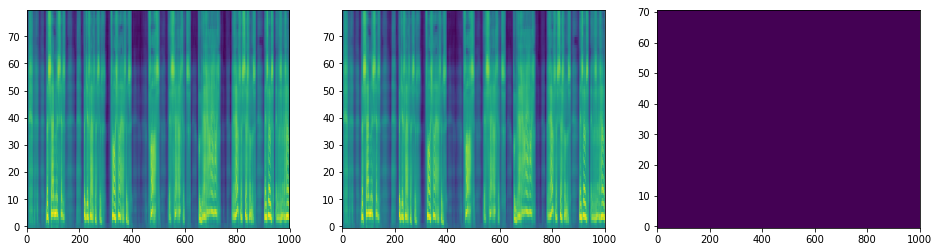

In [26]:
text = 'I see trees of green. Red roses, too. I see them bloom, for me and you.'
audio = inference.mel_to_audio(glow, inference.text_to_mel(model, text, glove)[1])

In [27]:
ipd.Audio(audio[0].data.cpu().numpy(), rate=22050)

In [28]:
sf.write('audio_output/generated_decoder_4.wav',audio[0].data.cpu().numpy().astype(np.float32),22050)    